In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━━━━╸━━━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [2]:
import yfinance as yf
import pandas as pd
import requests
import pytz
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Question 1 - Extracting Tesla Stock Data Using yfinance

In [4]:
#read the tesla data using ticker module
tesla = yf.Ticker("TSLA")
tesla_stock_data = tesla.history(period="max")
#print the few of results
print(tesla_stock_data.head())

                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


In [5]:
tesla_stock_data.reset_index(inplace=True)
tesla_stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [22]:
tesla_stock_data.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3465,2024-04-05,169.080002,170.860001,160.509995,164.899994,141250700,0,0.0
3466,2024-04-08,169.339996,174.500000,167.789993,172.979996,104423300,0,0.0
3467,2024-04-09,172.910004,179.220001,171.919998,176.880005,103232700,0,0.0
3468,2024-04-10,173.039993,174.929993,170.009995,171.759995,84532400,0,0.0
3469,2024-04-11,172.550003,175.880005,168.509995,174.600006,94367800,0,0.0


In [6]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [11]:
pip install html5lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 16.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
data  = requests.get(url).text
soup = BeautifulSoup(data, 'html5lib')

In [8]:
table = soup.find_all('table')[0]  # Assuming the first table on the webpage contains the revenue data

# Convert the table into a DataFrame
tesla_revenue = pd.read_html(str(table))[0]

# Rename columns to 'Date' and 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']
print(tesla_revenue.head())

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


In [9]:
#Remove special characters from revenue coulmn
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
# Remove null values from result
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [10]:
print(tesla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


In [11]:
#read the game stop data using ticker module
gme = yf.Ticker("GME")
gme_stock_data = gme.history(period="max")
#print the few of results
print(gme_stock_data.head())

                Open      High       Low     Close    Volume  Dividends  \
Date                                                                      
2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600        0.0   
2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

            Stock Splits  
Date                      
2002-02-13           0.0  
2002-02-14           0.0  
2002-02-15           0.0  
2002-02-19           0.0  
2002-02-20           0.0  


In [12]:
gme_stock_data.reset_index(inplace=True)
gme_stock_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [13]:
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text

In [14]:
soup = BeautifulSoup(data, 'html5lib')

In [15]:
table = soup.find_all('table')[0]  # Assuming the first table on the webpage contains the revenue data

# Convert the table into a DataFrame
gme_revenue = pd.read_html(str(table))[0]

# Rename columns to 'Date' and 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']
print(gme_revenue.head())

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


In [17]:
#Remove special characters from revenue coulmn
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
# Remove null values from result
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]
print(gme_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


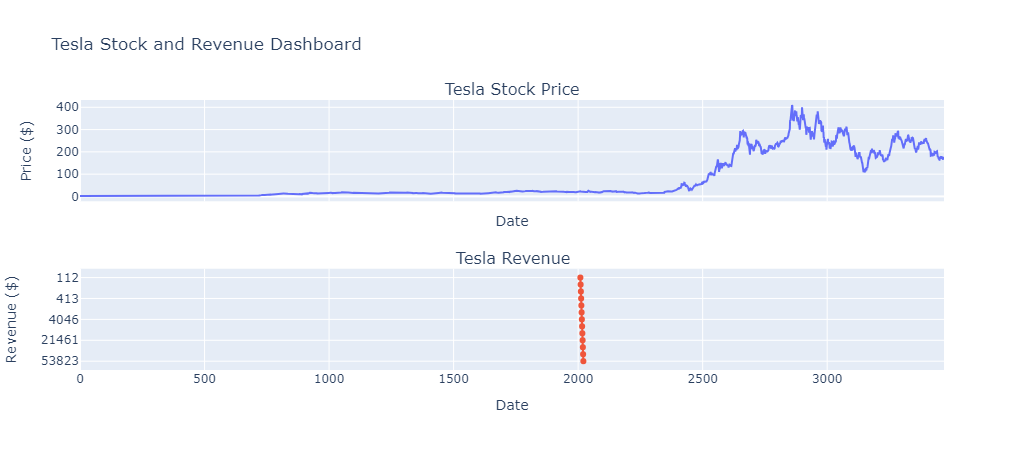

In [23]:
#Dashboard Graph Generate
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Tesla Stock Price", "Tesla Revenue"))

fig.add_trace(go.Scatter(x=tesla_stock_data.index, y=tesla_stock_data['Close'], name="Stock Price"), row=1, col=1)
fig.add_trace(go.Scatter(x=tesla_revenue['Date'], y=tesla_revenue['Revenue'], name="Revenue"), row=2, col=1)

fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Price ($)", row=1, col=1)
fig.update_yaxes(title_text="Revenue ($)", row=2, col=1)

fig.update_layout(title_text="Tesla Stock and Revenue Dashboard", showlegend=False)

fig.show()

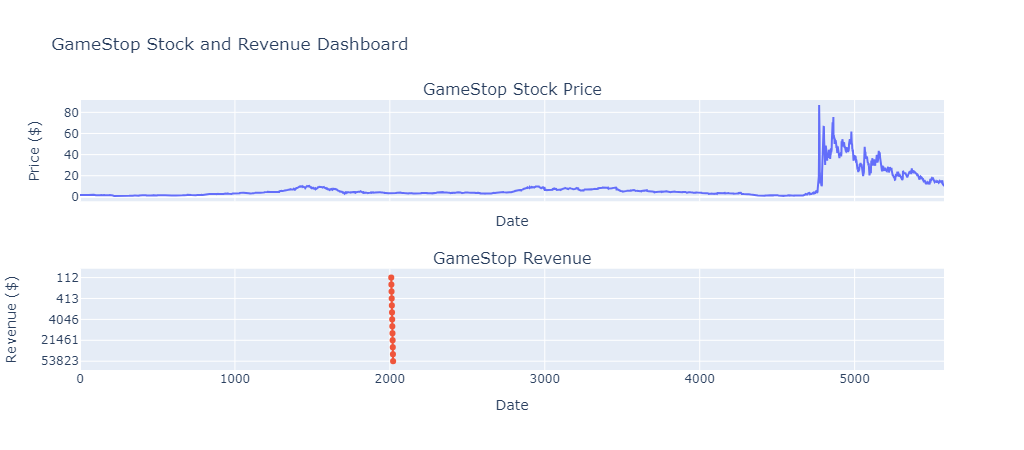

In [24]:
#Dashboard Graph Generate
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("GameStop Stock Price", "GameStop Revenue"))

fig.add_trace(go.Scatter(x=gme_stock_data.index, y=gme_stock_data['Close'], name="Stock Price"), row=1, col=1)
fig.add_trace(go.Scatter(x=gme_revenue['Date'], y=gme_revenue['Revenue'], name="Revenue"), row=2, col=1)

fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_yaxes(title_text="Price ($)", row=1, col=1)
fig.update_yaxes(title_text="Revenue ($)", row=2, col=1)

fig.update_layout(title_text="GameStop Stock and Revenue Dashboard", showlegend=False)

fig.show()